(200, 4)
<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>


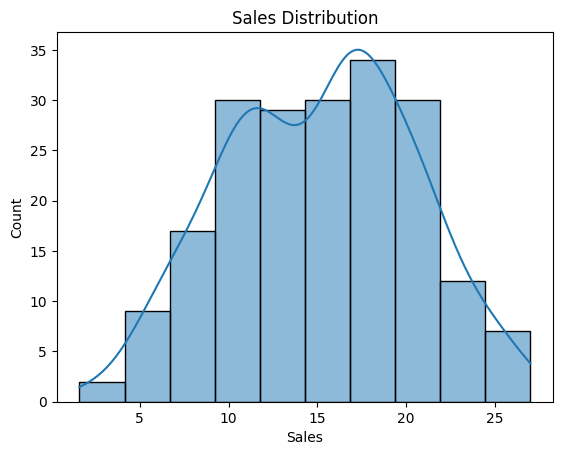

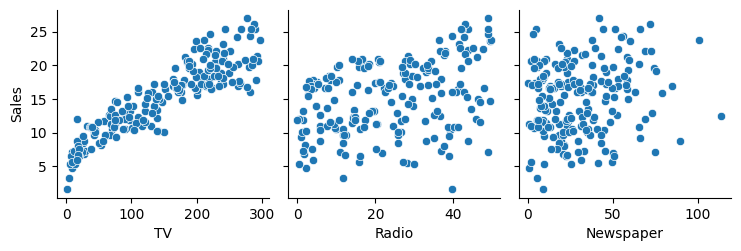

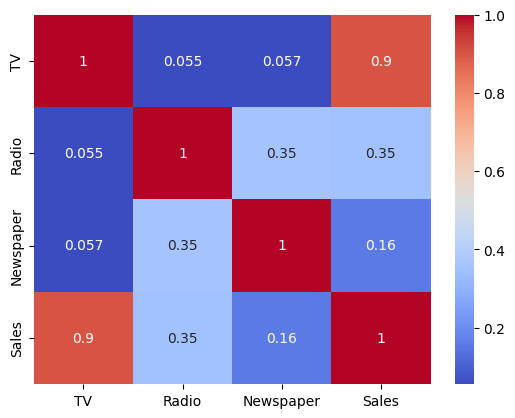

In [18]:
#EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("DS9.csv")

print(df.shape)
print(df.head)
df.isna().sum()

sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

sns.pairplot(df, y_vars='Sales', x_vars=['TV','Radio','Newspaper'])
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [13]:
#train / validation split....

from sklearn.model_selection import train_test_split

X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Linear Regression Model....

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

mse, r2


(2.9077569102710896, 0.9059011844150826)

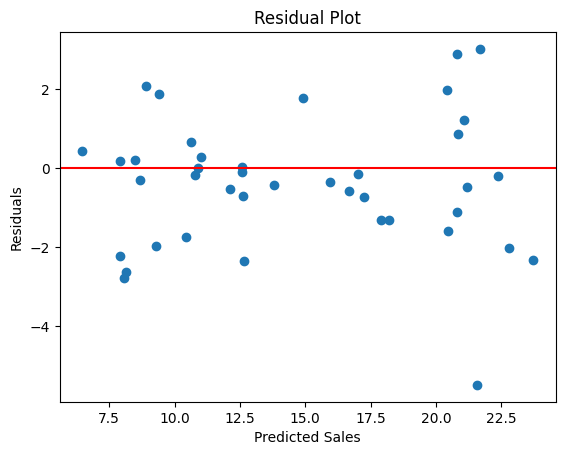

In [20]:
# residual plot...
residuals = y_val - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [21]:
#Heteroscedasticity....

'''residuals are randomly scattered around zero with slightly increasing variance at hogher predicted values indicating mild
heteroscedasticity but not severe enough to invalidate the linear regression assumptions.'''

'residuals are randomly scattered around zero with slightly increasing variance at hogher predicted values indicating mild\nheteroscedasticity but not severe enough to invalidate the linear regression assumptions.'